In [78]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import configparser, os



In [273]:
PLOT_VI_DIR = 'plots/vi'
PLOT_PI_DIR = 'plots/pi'
os.makedirs(PLOT_VI_DIR, exist_ok=True)
os.makedirs(PLOT_PI_DIR, exist_ok=True)


dir_bd = '../experiments/output/%s/blockdude/%s'
dir_gw = '../experiments/output/%s/gridworld/%s'
figsave_all = False

## Plotting VI 
    
   

In [223]:
def plot_vi(data, name='dsname', short_name='shortname', figsave=False):
        
    fig1, ax1 = plt.subplots(1, 1, figsize=(5,3))
    fig2, ax2 = plt.subplots(1, 1, figsize=(5,3))
    for d in data:
        g,df = d
        ax1.plot( df['iter'], df['delta'], label=r'$\gamma$ %.2f'%g)
        ax2.plot( df['iter'], df['wallclock'],label=r'$\gamma$ %.2f'%g)
    ax1.set_xlabel('Iteration');ax2.set_xlabel('Iteration')

    ax1.set_ylabel('delta');ax2.set_ylabel('wallclock (ms)')
    ax1.set_title(f"Delta convergence of VI for\n{name}")
    ax2.set_title(f"Wallclock time of VI for\n{name}")
    ax1.legend()
    ax2.legend()


    if figsave:
        fig1.savefig('plots/vi/vi_delta%s_results.png'%short_name, bbox_inches='tight')
        fig2.savefig('plots/vi/vi_wall%s_results.png'%short_name, bbox_inches='tight')
        plt.close(fig=fig1)
        plt.close(fig=fig2)
    else:
        plt.show()

In [224]:
config = configparser.ConfigParser()

def reload_tracker():
    config.read_file(open('../experiments/tracker.ini'))
    dConfig = config['default']
    return dConfig


RUN ID: 27203333


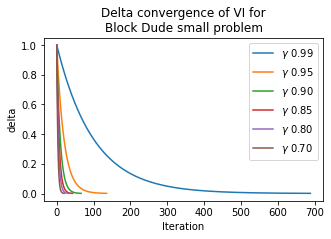

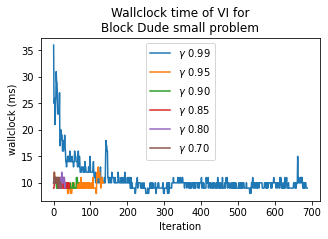

In [259]:
dConfig = reload_tracker()
bdname_sm = 'mybdsm'
bdsm_exp_id = dConfig[bdname_sm]
gammas = [0.99, 0.95, 0.90, 0.85, 0.8, 0.7]

print(f"RUN ID: {bdsm_exp_id}")

# outdir = dir_bd % (bdname_sm+'-'+bdsm_exp_id, 'vi_sm_bd_01-00.csv')
bdsm_dfs_vi = []
for gamma in gammas:
    filename = 'vi_sm_bd_%.2f-00.csv'%gamma
    bdsm_dfs_vi.append( (gamma,  pd.read_csv(dir_bd%(bdname_sm+'-'+bdsm_exp_id, filename)) ))
#     print(dir_bd%(bdname_sm+'-'+bdsm_exp_id, filename))

plot_vi(bdsm_dfs_vi, "Block Dude small problem", bdname_sm, figsave=figsave_all) 



In [260]:
def plot_pi(data, name='dsname', short_name='shortname', figsave=False):
        
    fig1, ax1 = plt.subplots(1, 1, figsize=(5,3))
    fig2, ax2 = plt.subplots(1, 1, figsize=(5,3))
    fig3, ax3 = plt.subplots(1, 1, figsize=(5,3))
    
    for d in data:
        g,df = d
        ax1.plot( df['iter'], df['delta'], label=r'$\gamma$ %.2f'%g)
        ax2.plot( df['iter'], df['wallclock'],label=r'$\gamma$ %.2f'%g)
        ax3.plot( df['iter'], df['evals'],label=r'$\gamma$ %.2f'%g)
    ax1.set_xlabel('Iteration');ax2.set_xlabel('Iteration');ax3.set_xlabel('Iteration')

    ax1.set_ylabel('delta');ax2.set_ylabel('wallclock (ms)')
    ax1.set_title(f"Delta convergence of PI for\n{name}")
    ax2.set_title(f"Wallclock time of PI for\n{name}")
    ax3.set_title(f"BURLAP per-policy inner evals for\n{name}")
    ax1.legend()
    ax2.legend()
    ax3.legend()


    if figsave:
        fig1.savefig('plots/pi/pi_delta%s_results.png'%short_name, bbox_inches='tight')
        fig2.savefig('plots/pi/pi_wall%s_results.png'%short_name, bbox_inches='tight')
        fig3.savefig('plots/pi/pi_eval%s_results.png'%short_name, bbox_inches='tight')
        plt.close(fig=fig1)
        plt.close(fig=fig2)
        plt.close(fig=fig3)
    else:
        plt.show()

RUN ID: 27203333


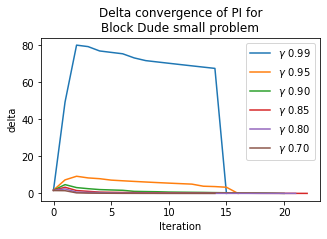

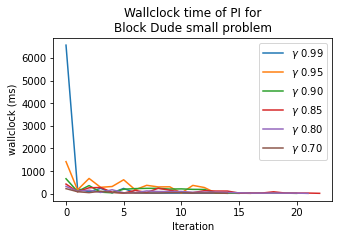

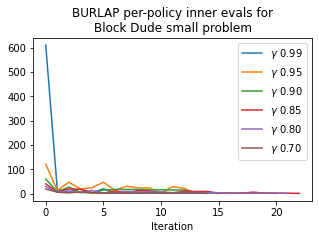

In [261]:
print(f"RUN ID: {bdsm_exp_id}")
    
bdsm_dfs_pi = []
for gamma in gammas:
    filename = 'pi_sm_bd_%.2f-00.csv'%gamma
    bdsm_dfs_pi.append( (gamma,  pd.read_csv(dir_bd%(bdname_sm+'-'+bdsm_exp_id, filename)) ))
    
plot_pi(bdsm_dfs_pi, "Block Dude small problem", bdname_sm, figsave=figsave_all) 

## BlockDude large problem

RUN ID: 27212121


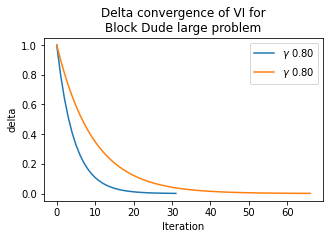

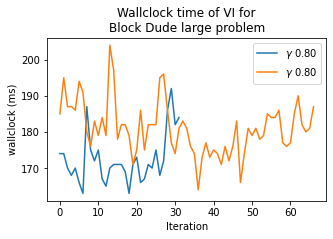

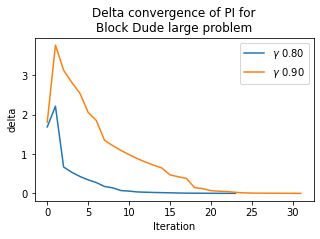

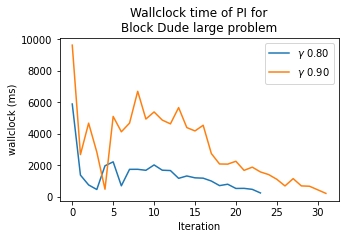

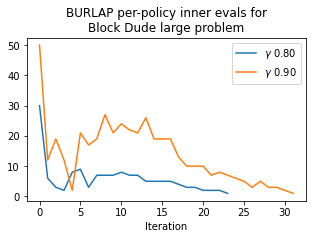

In [274]:
dConfig = reload_tracker()
bdname_lrg = 'mybdlrg'
bdlrg_exp_id = dConfig[bdname_lrg]
print(f"RUN ID: {bdlrg_exp_id}")


bdlrg_dfs_vi = []

filename = 'vi_lrg_bd_0.80-00.csv'
bdlrg_dfs_vi.append( (0.80,  pd.read_csv(dir_bd%(bdname_lrg+'-'+bdlrg_exp_id, filename)) ))
filename = 'vi_lrg_bd_0.90-00.csv'
bdlrg_dfs_vi.append( (0.80,  pd.read_csv(dir_bd%(bdname_lrg+'-'+bdlrg_exp_id, filename)) ))
    
plot_vi(bdlrg_dfs_vi, "Block Dude large problem", bdname_lrg, figsave=figsave_all) 


bdlrg_dfs_pi = []
filename = 'pi_lrg_bd_0.80-00.csv'
bdlrg_dfs_pi.append( (0.80,  pd.read_csv(dir_bd%(bdname_lrg+'-'+bdlrg_exp_id, filename)) ))
filename = 'pi_lrg_bd_0.90-00.csv'
bdlrg_dfs_pi.append( (0.90,  pd.read_csv(dir_bd%(bdname_lrg+'-'+bdlrg_exp_id, filename)) ))
    
plot_pi(bdlrg_dfs_pi, "Block Dude large problem", bdname_lrg, figsave=figsave_all) 


In [246]:
def plot_vipi_gamma_results(df, name='dsname', short_name='shortname', alg='vi', figsave=False):
    
    alg_name = 'Value Iteration' if alg == 'vi' else 'Policy Iteration'
    
    fig1, ax1 = plt.subplots(1, 1, figsize=(5,3))
    fig2, ax2 = plt.subplots(1, 1, figsize=(5,3))
    fig3, ax3 = plt.subplots(1, 1, figsize=(5,3))

    ax1.plot( df['run'], df['totalRewards'], marker='*', linewidth=0.7)
    ax2.plot( df['run'], df['wallclock'], marker='*', linewidth=0.7)
    ax3.plot( df['run'], df['viEvals'], marker='*', linewidth=0.7)
    ax1.set_xlabel('Gamma $\gamma$');ax2.set_xlabel('Gamma $\gamma$');ax3.set_xlabel('Gamma $\gamma$')

    ax1.set_ylabel('Total Rewards');ax2.set_ylabel('Wallclock (ms)');ax3.set_ylabel('Inner evals')
    ax1.set_title(f"{alg_name} Total Rewards over $\gamma$\n{name}")
    ax2.set_title(f"{alg_name} Wallclock time over $\gamma$\n{name}")
    ax3.set_title(f"{alg_name} Burlap inner evals over $\gamma$\n{name}")
 


    if figsave:
        fig1.savefig('plots/%s/%s_rewards_bygamma%s_results.png'%(alg,alg,short_name), bbox_inches='tight')
        fig2.savefig('plots/%s/%s_wallclock_bygamma%s_results.png'%(alg,alg,short_name), bbox_inches='tight')
        fig3.savefig('plots/%s/%s_innereval_bygamma%s_results.png'%(alg,alg,short_name), bbox_inches='tight')
        plt.close(fig=fig1)
        plt.close(fig=fig2)
        plt.close(fig=fig3)
    else:
        plt.show()

RUN ID LRG: 27212121
RUN ID SM: 28165858


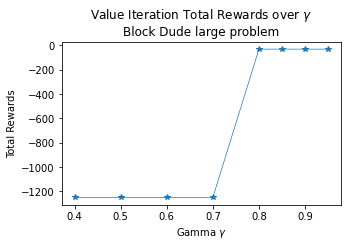

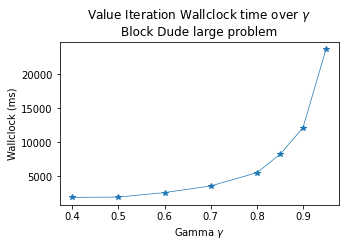

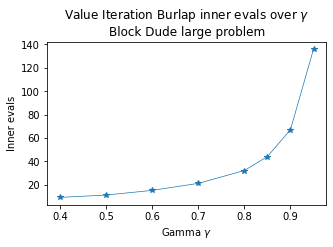

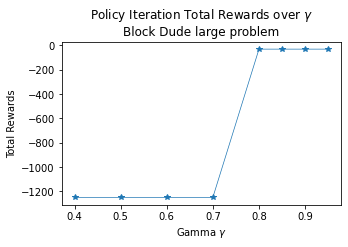

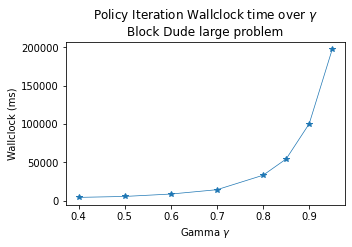

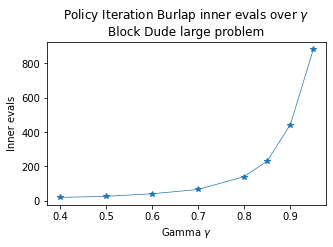

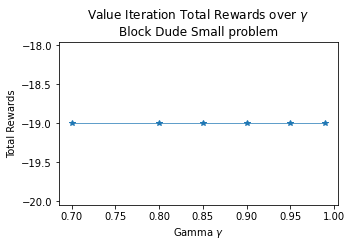

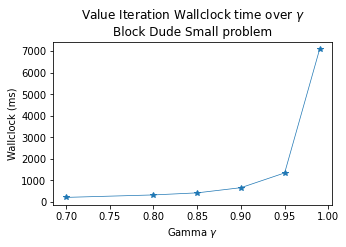

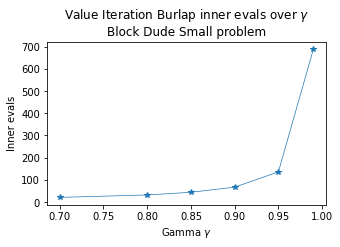

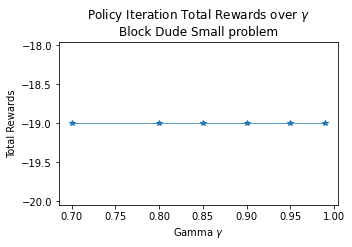

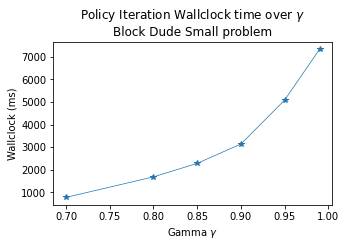

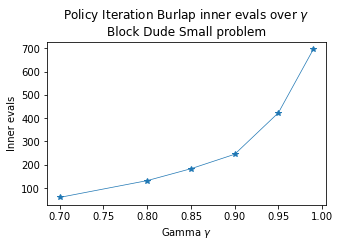

In [275]:
dConfig = reload_tracker()
bdname_lrg = 'mybdlrg'
bdname_sm = 'mybdsm'
bdlrg_exp_id = dConfig[bdname_lrg]
bdsm_exp_id = dConfig[bdname_sm]
print(f"RUN ID LRG: {bdlrg_exp_id}")
print(f"RUN ID SM: {bdsm_exp_id}")

filename_vi = 'vi_lrg_bd_result.csv'
bd_vi_gamma_res_filename = dir_bd%(bdname_lrg+'-'+bdlrg_exp_id, filename_vi)
bd_vi_gamma_df = pd.read_csv(bd_vi_gamma_res_filename)
plot_vipi_gamma_results(bd_vi_gamma_df, "Block Dude large problem", bdname_lrg, 'vi', figsave_all)

filename_pi = 'pi_lrg_bd_result.csv'
bd_vi_gamma_res_filename = dir_bd%(bdname_lrg+'-'+bdlrg_exp_id, filename_pi)
bd_vi_gamma_df = pd.read_csv(bd_vi_gamma_res_filename)
plot_vipi_gamma_results(bd_vi_gamma_df, "Block Dude large problem", bdname_lrg, 'pi', figsave_all)

filename_vi = 'vi_sm_bd_result.csv'
bd_vi_gamma_res_filename = dir_bd%(bdname_sm+'-'+bdsm_exp_id, filename_vi)
bd_vi_gamma_df = pd.read_csv(bd_vi_gamma_res_filename)
plot_vipi_gamma_results(bd_vi_gamma_df, "Block Dude Small problem", bdname_sm, 'vi', figsave_all)

filename_pi = 'pi_sm_bd_result.csv'
bd_vi_gamma_res_filename = dir_bd%(bdname_sm+'-'+bdsm_exp_id, filename_pi)
bd_vi_gamma_df = pd.read_csv(bd_vi_gamma_res_filename)
plot_vipi_gamma_results(bd_vi_gamma_df, "Block Dude Small problem", bdname_sm, 'pi', figsave_all)

## Grid Worlds here

RUN ID: 28100808


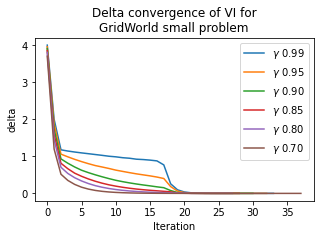

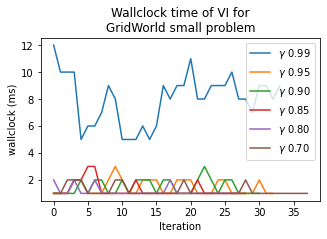

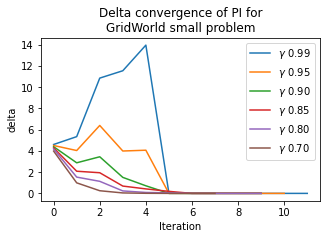

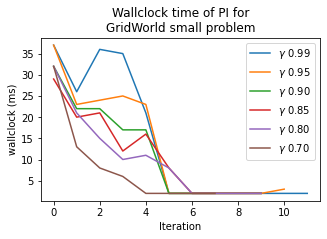

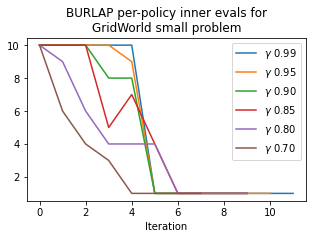

In [255]:
dConfig = reload_tracker()
gwname_sm = 'mygwsm'
gwsm_exp_id = dConfig[gwname_sm]
gammas = [0.99, 0.95, 0.90, 0.85, 0.8, 0.7]

print(f"RUN ID: {gwsm_exp_id}")

# outdir = dir_bd % (bdname_sm+'-'+bdsm_exp_id, 'vi_sm_bd_01-00.csv')
gwsm_dfs_vi = []
for gamma in gammas:
    filename = 'vi_sm_gw_%.2f-00.csv'%gamma
    gwsm_dfs_vi.append( (gamma,  pd.read_csv(dir_gw%(gwname_sm+'-'+gwsm_exp_id, filename)) ))
#     print(dir_bd%(bdname_sm+'-'+bdsm_exp_id, filename))

plot_vi(gwsm_dfs_vi, "GridWorld small problem", gwname_sm, figsave=figsave_all) 

gwsm_dfs_pi = []
for gamma in gammas:
    filename = 'pi_sm_gw_%.2f-00.csv'%gamma
    gwsm_dfs_pi.append( (gamma,  pd.read_csv(dir_gw%(gwname_sm+'-'+gwsm_exp_id, filename)) ))
#     print(dir_bd%(bdname_sm+'-'+bdsm_exp_id, filename))

plot_pi(gwsm_dfs_pi, "GridWorld small problem", gwname_sm, figsave=figsave_all) 


### Gridworld Large

In [265]:
dConfig = reload_tracker()
dConfig = reload_tracker()
gwname_lrg = 'mygwlrg-gamma'
gwlrg_exp_id = dConfig[gwname_sm]

print(f"RUN ID: {gwsm_exp_id}")


gwlrg_dfs_vi = []

filename = 'vi_lrg_gw_0.95-00.csv'
gwlrg_dfs_vi.append( (0.95,  pd.read_csv(dir_gw%(gwname_lrg+'-'+gwlrg_exp_id, filename)) ))
filename = 'vi_lrg_gw_0.99-00.csv'
gwlrg_dfs_vi.append( (0.99,  pd.read_csv(dir_gw%(gwname_lrg+'-'+gwlrg_exp_id, filename)) ))
    
plot_vi(gwlrg_dfs_vi, "GridWorld large problem", gwname_lrg, figsave=figsave_all) 


gwlrg_dfs_vi = []
filename = 'pi_lrg_gw_0.95-00.csv'
gwlrg_dfs_vi.append( (0.95,  pd.read_csv(dir_gw%(gwname_lrg+'-'+gwlrg_exp_id, filename)) ))
filename = 'pi_lrg_gw_0.99-00.csv'
gwlrg_dfs_vi.append( (0.99,  pd.read_csv(dir_gw%(gwname_lrg+'-'+gwlrg_exp_id, filename)) ))
    
plot_pi(gwlrg_dfs_vi, "GridWorld large problem", gwname_lrg, figsave=figsave_all) 


RUN ID: 28100808


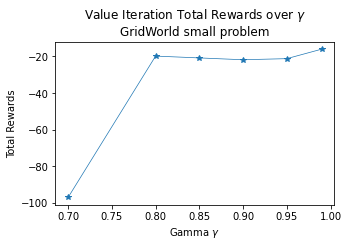

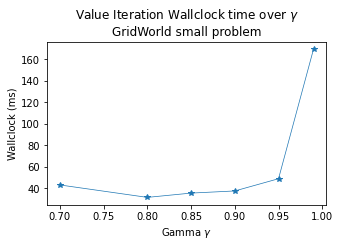

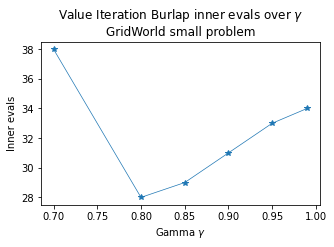

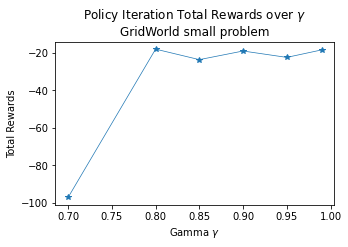

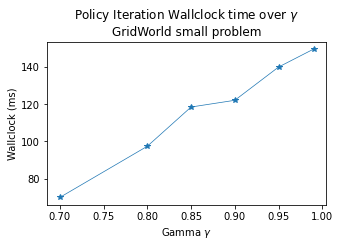

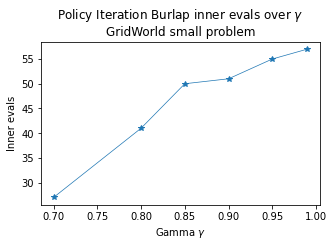

In [257]:
dConfig = reload_tracker()
gwname_sm = 'mygwsm'
gwsm_exp_id = dConfig[gwname_sm]
def merge_dfs_pivi_resutls_sm(alg='vi'):
    df_all = pd.DataFrame()
    for i in range(5):
        filename = f'{alg}_sm_gw_gamma_result-{i:02}.csv'
        fullfilename = dir_gw%(gwname_sm+'-'+gwsm_exp_id, filename)
#         print(fullfilename)
#         df_all['run'],df_all['wallclock'], df_all['totalRewards'], df_all['viEvals'] = 
        df_now = pd.read_csv(fullfilename)
#         print(df_now)
        if i ==0:
            df_all =df_now
        else:
            df_all = df_all + df_now
#         print(df_all.head())
    
    df_all = df_all / 5
    return df_all

merged_vi_gw_small = merge_dfs_pivi_resutls_sm('vi')
merged_pi_gw_small = merge_dfs_pivi_resutls_sm('pi')
plot_vipi_gamma_results(merged_vi_gw_small, "GridWorld small problem", gwname_sm, 'vi', figsave_all)
plot_vipi_gamma_results(merged_pi_gw_small, "GridWorld small problem", gwname_sm, 'pi', figsave_all)

RUN ID: 28100808


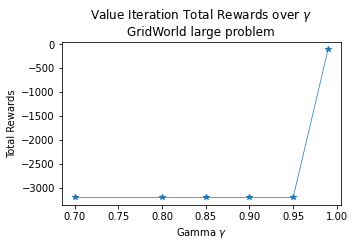

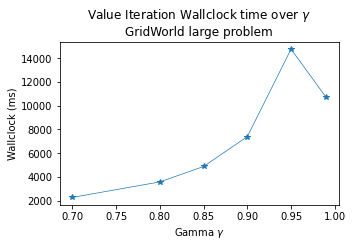

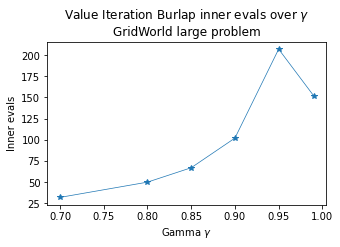

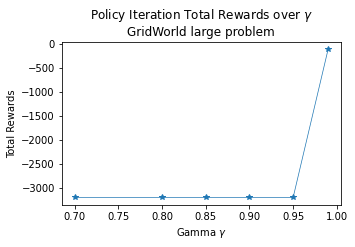

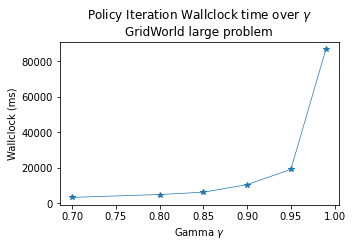

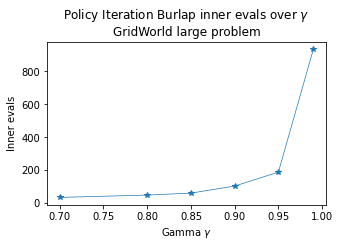

In [258]:
dConfig = reload_tracker()
gwname_lrg_gamma = 'mygwlrg-gamma'
gwlrg_exp_gamma_id = dConfig[gwname_lrg_gamma]
print(f"RUN ID: {gwlrg_exp_gamma_id}")

def merge_dfs_pivi_resutls_lrg(alg='vi'):
    df_all = pd.DataFrame()
    for i in range(5):
        filename = f'{alg}_lrg_gw_gamma_result-{i:02}.csv'
        fullfilename = dir_gw%(gwname_lrg_gamma+'-'+gwlrg_exp_gamma_id, filename)
#         print(fullfilename)
#         df_all['run'],df_all['wallclock'], df_all['totalRewards'], df_all['viEvals'] = 
        df_now = pd.read_csv(fullfilename)
#         print(df_now)
        if i ==0:
            df_all =df_now
        else:
            df_all = df_all + df_now
#         print(df_all.head())
    
    df_all = df_all / 5
    return df_all

merged_vi_gw_lrg = merge_dfs_pivi_resutls_lrg('vi')
merged_pi_gw_lrg= merge_dfs_pivi_resutls_lrg('pi')
plot_vipi_gamma_results(merged_vi_gw_lrg, "GridWorld large problem", gwname_lrg_gamma, 'vi', figsave_all)
plot_vipi_gamma_results(merged_pi_gw_lrg, "GridWorld large problem", gwname_lrg_gamma, 'pi', figsave_all)